This is a learning notebook. The contents in this notebook are taken from various sources namely documentation

In [1]:
import torch

It is similar to numpy arrays.

##Tensors  

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other specialized hardware to accelerate computing. If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along in this quick API walkthrough.

In [2]:
# Simple ways of creating a tensor

x = torch.empty(3, 4)
print(type(x))
print(x)

zeros = torch.zeros(2, 3)
print(zeros)

ones = torch.ones(2, 3)
print(ones)



<class 'torch.Tensor'>
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


### dtypes in tensors
Available data types include:

- torch.bool
- torch.int8
- torch.uint8
- torch.int16
- torch.int32
- torch.int64
- torch.half
- torch.float
- torch.double
- torch.bfloat

In [3]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype) # Note default dtype is float

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [4]:
i = torch.ones((5, 3), dtype=torch.int16) # Assigning a dtype
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [5]:
a = torch.ones((2, 3), dtype=torch.int16)
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

c = b.to(torch.int32)  # Changing the dtype of a tensor
print(c)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[ 8.2841,  9.0277, 14.0101],
        [17.8955, 12.4802,  5.6579]], dtype=torch.float64)
tensor([[ 8,  9, 14],
        [17, 12,  5]], dtype=torch.int32)


In [6]:
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [7]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise
print(threes.shape)        # this has the same dimensions as input tensors



tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


### Tensor Shapes
Often, when you’re performing operations on two or more tensors, they will need to be of the same shape - that is, having the same number of dimensions and the same number of cells in each dimension. For that, we have the torch.*_like() methods:

In [8]:
x = torch.empty(2, 2, 3)  #Creates an empty tensor of the given shape
print(x.shape)
print(x)

empty_like_x = torch.empty_like(x) # Creates an uninitialized tensor of the given shape(means allocating memory for a tensor without initializing its values.)
print(empty_like_x.shape)
print(empty_like_x)

zeros_like_x = torch.zeros_like(x) # Creates a tensor of zeros with the same shape as x.
print(zeros_like_x.shape)
print(zeros_like_x)

ones_like_x = torch.ones_like(x) #Creates a tensor of ones with the same shape as x.
print(ones_like_x.shape)
print(ones_like_x)

rand_like_x = torch.rand_like(x) #Creates a tensor of random values with the same shape as x.
print(rand_like_x.shape)
print(rand_like_x)

torch.Size([2, 2, 3])
tensor([[[-1.1010e-09,  3.2747e-41, -1.0954e-09],
         [ 3.2747e-41,  8.9683e-44,  0.0000e+00]],

        [[ 1.1210e-43,  0.0000e+00, -2.8860e-07],
         [ 7.0065e-45,  3.3661e-05,  4.4324e-41]]])
torch.Size([2, 2, 3])
tensor([[[ 1.1231e+13,  4.4324e-41,  1.1231e+13],
         [ 4.4324e-41,  0.0000e+00,  1.1755e-38]],

        [[-1.0718e-12,  3.2747e-41,  2.0000e+00],
         [ 0.0000e+00, -1.1011e-09,  3.2747e-41]]])
torch.Size([2, 2, 3])
tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
torch.Size([2, 2, 3])
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
torch.Size([2, 2, 3])
tensor([[[0.4216, 0.0691, 0.2332],
         [0.4047, 0.2162, 0.9927]],

        [[0.4128, 0.5938, 0.6128],
         [0.1519, 0.0453, 0.5035]]])


In [9]:
#Some other ways to create a tensor
some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)

tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])
tensor([ 2,  3,  5,  7, 11, 13, 17, 19])
tensor([[2, 4, 6],
        [3, 6, 9]])


In [10]:
print(torch.rand(2, 2)) #by Default torch.rand() has an interval of (0,1]

# to change the interval
a = 5  # lower bound
b = 10 # upper bound
a + (b - a) * torch.rand(2, 2)

tensor([[0.9978, 0.3884],
        [0.6929, 0.1703]])


tensor([[5.6922, 7.3795],
        [8.7404, 5.1806]])

In [11]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[ 0.0124,  0.6939],
        [-0.4823, -0.4587]])

Absolute value of r:
tensor([[0.0124, 0.6939],
        [0.4823, 0.4587]])

Inverse sine of r:
tensor([[ 0.0124,  0.7669],
        [-0.5033, -0.4765]])

Determinant of r:
tensor(0.3290)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[ 0.7278, -0.6858],
        [-0.6858, -0.7278]]),
S=tensor([0.8872, 0.3708]),
V=tensor([[ 0.3830,  0.9237],
        [ 0.9237, -0.3830]]))

Average and standard deviation of r:
(tensor(0.5510), tensor(-0.0587))

Maximum value of r:
tensor(0.6939)


### Math & Logic with PyTorch Tensors

In [12]:
# With Scalars
# Arithmetic operations between tensors and scalars, such as addition, subtraction, multiplication, division, and exponentiation are distributed over every element of the tensor.
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[4., 4.],
        [4., 4.]])
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


In [13]:
# For operations between two tensors, make sure the shapes are identical
powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)

tensor([[ 2.,  4.],
        [ 8., 16.]])
tensor([[5., 5.],
        [5., 5.]])
tensor([[12., 12.],
        [12., 12.]])


### Tensor Broadcasting
Broadcasting is a way to perform an operation between tensors that have similarities in their shapes. In the example above, the one-row, four-column tensor is multiplied by both rows of the two-row, four-column tensor.



The rules for broadcasting are:

- Each tensor must have at least one dimension - no empty tensors.
- Comparing the dimension sizes of the two tensors, going from last to first:
  - Each dimension must be equal, or
  - One of the dimensions must be of size 1, or
  - The dimension does not exist in one of the tensors
  - Tensors of identical shape, of course, are trivially “broadcastable”

In [14]:
# This is an important operation in Deep Learning. The common example is multiplying a tensor of learning weights by a batch of input tensors, applying the operation to each instance in the batch separately, and returning a tensor of identical shape - just like our (2, 4) * (1, 4) example above returned a tensor of shape (2, 4).

rand = torch.rand(2, 4)
doubled = rand * (torch.ones(1, 4) * 2)

print(rand)
print(doubled)

tensor([[0.4115, 0.6839, 0.0703, 0.5105],
        [0.9451, 0.2359, 0.1979, 0.3327]])
tensor([[0.8230, 1.3677, 0.1405, 1.0210],
        [1.8901, 0.4717, 0.3959, 0.6655]])


In [15]:
# Lets explore some more examples
a =  torch.ones(4, 3, 2)

print('Example 1')
rand1 = torch.rand(   3, 2)
print(rand1)
b = a * rand1 # 3rd & 2nd dims identical to a, dim 1 absent
print(b)

print('Example 2')
rand2 = torch.rand(   3, 1)
print(rand2)
c = a * rand2 # 3rd dim = 1, 2nd dim identical to a
print(c)

print('Example 3')
rand3 = torch.rand(   1, 2)
print(rand3)
d = a * rand3 # 3rd dim identical to a, 2nd dim = 1
print(d)

Example 1
tensor([[0.6146, 0.5999],
        [0.5013, 0.9397],
        [0.8656, 0.5207]])
tensor([[[0.6146, 0.5999],
         [0.5013, 0.9397],
         [0.8656, 0.5207]],

        [[0.6146, 0.5999],
         [0.5013, 0.9397],
         [0.8656, 0.5207]],

        [[0.6146, 0.5999],
         [0.5013, 0.9397],
         [0.8656, 0.5207]],

        [[0.6146, 0.5999],
         [0.5013, 0.9397],
         [0.8656, 0.5207]]])
Example 2
tensor([[0.6865],
        [0.3614],
        [0.6493]])
tensor([[[0.6865, 0.6865],
         [0.3614, 0.3614],
         [0.6493, 0.6493]],

        [[0.6865, 0.6865],
         [0.3614, 0.3614],
         [0.6493, 0.6493]],

        [[0.6865, 0.6865],
         [0.3614, 0.3614],
         [0.6493, 0.6493]],

        [[0.6865, 0.6865],
         [0.3614, 0.3614],
         [0.6493, 0.6493]]])
Example 3
tensor([[0.2633, 0.4762]])
tensor([[[0.2633, 0.4762],
         [0.2633, 0.4762],
         [0.2633, 0.4762]],

        [[0.2633, 0.4762],
         [0.2633, 0.4762],
        

In [16]:
# Some common functions with tensors

import math

# common functions
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a, -0.5, 0.5))

# trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)

# bitwise operations
print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))

# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!
print(torch.eq(d, e)) # returns a tensor of type bool

# reductions:
print('\nReduction ops:')
print(torch.max(d))        # returns a single-element tensor
print(torch.max(d).item()) # extracts the value from the returned tensor
print(torch.mean(d))       # average
print(torch.std(d))        # standard deviation
print(torch.prod(d))       # product of all numbers
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements

# vector and linear algebra operations
v1 = torch.tensor([1., 0., 0.])         # x unit vector
v2 = torch.tensor([0., 1., 0.])         # y unit vector
m1 = torch.rand(2, 2)                   # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('\nVectors & Matrices:')
print(torch.cross(v2, v1)) # negative of z unit vector (v1 x v2 == -v2 x v1)
print(m1)
m3 = torch.matmul(m1, m2)
print(m3)                  # 3 times m1
print(torch.svd(m3))       # singular value decomposition

Common functions:
tensor([[0.8904, 0.5951, 0.1461, 0.4382],
        [0.1866, 0.4602, 0.2551, 0.4715]])
tensor([[-0., -0., 1., 1.],
        [-0., 1., 1., 1.]])
tensor([[-1., -1.,  0.,  0.],
        [-1.,  0.,  0.,  0.]])
tensor([[-0.5000, -0.5000,  0.1461,  0.4382],
        [-0.1866,  0.4602,  0.2551,  0.4715]])

Sine and arcsine:
tensor([0.0000, 0.7854, 1.5708, 2.3562])
tensor([0.0000, 0.7071, 1.0000, 0.7071])
tensor([0.0000, 0.7854, 1.5708, 0.7854])

Bitwise XOR:
tensor([3, 2, 1])

Broadcasted, element-wise equality comparison:
tensor([[ True, False],
        [False, False]])

Reduction ops:
tensor(4.)
4.0
tensor(2.5000)
tensor(1.2910)
tensor(24.)
tensor([1, 2])

Vectors & Matrices:
tensor([ 0.,  0., -1.])
tensor([[0.0381, 0.2138],
        [0.5395, 0.3686]])
tensor([[0.1143, 0.6414],
        [1.6186, 1.1057]])
torch.return_types.svd(
U=tensor([[-0.2387, -0.9711],
        [-0.9711,  0.2387]]),
S=tensor([2.0155, 0.4524]),
V=tensor([[-0.7934,  0.6087],
        [-0.6087, -0.7934]]))


In [17]:
# Copying Tensors
a = torch.ones(2, 2)
b = a.clone()

### Moving to GPU
One of the major advantages of PyTorch is its robust acceleration on CUDA-compatible Nvidia GPUs. (“CUDA” stands for Compute Unified Device Architecture, which is Nvidia’s platform for parallel computing.) So far, everything we’ve done has been on CPU. How do we move to the faster hardware?

First, we should check whether a GPU is available, with the ```is_available()``` method.

In [18]:
if torch.cuda.is_available():
    print('We have a GPU!')
else:
    print('Sorry, CPU only.')

We have a GPU!


In [19]:
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')
print('Device: {}'.format(my_device))

x = torch.rand(2, 2, device=my_device)
print(x)

Device: cuda
tensor([[0.3344, 0.2640],
        [0.2119, 0.0582]], device='cuda:0')


### Manipulating Tensors

In [20]:
# Changing dimensions of Tensor
a = torch.rand(3, 226, 226)
b = a.unsqueeze(0)  # a.unsqueeze(0): Adds a new dimension at the specified position (0 in this case).

print(a.shape)
print(b.shape)

torch.Size([3, 226, 226])
torch.Size([1, 3, 226, 226])


In [21]:
a = torch.rand(1, 20)
print(a.shape)
print(a)

b = a.squeeze(0) #Removes a dimension at the specified position (0 in this case). Since the original tensor a had a size of 1 along this dimension, it is removed.
print(b.shape)
print(b)

c = torch.rand(2, 2)
print(c.shape)

d = c.squeeze(0) # Attempts to remove a dimension at position 0. However, since the original tensor c does not have a size-1 dimension along this axis, the tensor remains unchanged.
print(d.shape)

# In summary, the squeeze method is used to remove dimensions with size 1. If the specified dimension has size greater than 1 or does not exist, the tensor remains unchanged.

torch.Size([1, 20])
tensor([[0.8394, 0.8083, 0.5408, 0.2576, 0.5258, 0.5329, 0.5899, 0.4933, 0.3665,
         0.1891, 0.9775, 0.7781, 0.0915, 0.4627, 0.7947, 0.7478, 0.8827, 0.6334,
         0.3902, 0.3691]])
torch.Size([20])
tensor([0.8394, 0.8083, 0.5408, 0.2576, 0.5258, 0.5329, 0.5899, 0.4933, 0.3665,
        0.1891, 0.9775, 0.7781, 0.0915, 0.4627, 0.7947, 0.7478, 0.8827, 0.6334,
        0.3902, 0.3691])
torch.Size([2, 2])
torch.Size([2, 2])


In [22]:
# Reshaping a tensor
output3d = torch.rand(6, 20, 20)
print(output3d.shape)

# Note: The dimensions you request yield the same number of elements as the input tensor
input1d = output3d.reshape(6 * 20 * 20)
print(input1d.shape)

torch.Size([6, 20, 20])
torch.Size([2400])


In [23]:
# Converting numpy to tensor
import numpy as np

numpy_array = np.ones((2, 3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

# Converting tensors to numpy
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

# Note: Since both numpy array and tensor will share the same memory, manipulation/change in any one will lead to manipulation/change in other

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[0.1923, 0.2480, 0.1941],
        [0.2385, 0.0628, 0.6008]])
[[0.19231671 0.2479614  0.1940757 ]
 [0.23848575 0.06282878 0.6008167 ]]


## Model buidling using Torch

# Data set and DataLoader

In [24]:
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

# For converting the inputs into required format for torch. First convert the inputs to tensors then normalize it

# But before loading the dataset and setting up means and std for transforms use the below code for calculating them
# Assuming you have a CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=None)

# Calculate mean and std for each channel
mean = tuple(trainset.data.mean(axis=(0, 1, 2)) / 255.0)
std = tuple(trainset.data.std(axis=(0, 1, 2)) / 255.0)

print(mean)
print(std)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])  #  (means), (std)

# loading a inbuilt dataset CIFAR10 using the transformation
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

# trainset: This is assumed to be a PyTorch dataset
# batch_size=4: This parameter determines the number of samples in each batch.
#               During training, the model's parameters are updated based on the average loss computed over this batch.

# shuffle=True: This parameter indicates whether the data should be shuffled at the beginning of each epoch.
# Shuffling helps in randomizing the order of samples within each batch, preventing the model from learning patterns based on the order of the data.

# num_workers=2: This parameter specifies the number of worker processes to use for data loading.
# Multiple workers can load batches in parallel, improving data loading efficiency. The value of num_workers is often set based on the available CPU cores.


# Repeat the same for test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:13<00:00, 12891696.11it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
(0.49139967861519607, 0.48215840839460783, 0.44653091444546567)
(0.24703223246328176, 0.24348512800005648, 0.26158784172796473)
Files already downloaded and verified
Files already downloaded and verified


 bird  ship plane  bird


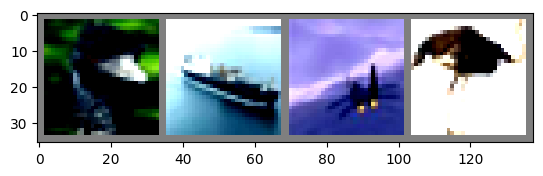

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [27]:
# The input image is of 32x32 size with 3 channels

# So base on the architecture the first convolution layer should have 3 filters
# The output from first layer will have size of 28x28 then with max pooling with filter of 2 and stride 2 gives output of size 14x14
# The output from second layer will have size of 10x10 then with max pooling with filter of 2 and stride 2 gives output of size 5x5
# For the feedforward network ahead we will have to flatten it using these dimensions 16 * 5 * 5
# then it followed by a fully connnected network


# Loading relevant libraries
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np



# Setting up a class for neural network architecture

class Net(nn.Module):
    def __init__(self): #Set up the operations you want to perform in the Neural Network
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5) #(InputChannel, OutputChannels, SizeofFilter)
        self.pool = nn.MaxPool2d(2,2) # formats (2,2) (filter size, stride)   #Other format ((2,2), stride = 2)
        self.conv2 = nn.Conv2d(6,16,5) #(InputChannel, OutputChannels, SizeofFilter)
        self.fc1 = nn.Linear(16*5*5,120) #(Inputs, outputs)
        self.fc2 = nn.Linear(120,84) #(Inputs, outputs)
        self.fc3 = nn.Linear(84,10) #(Inputs, outputs)

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5) # Reshapes the output tensor into a 1D tensor for input to the fully connected layers.
        x = self.fc1(x)
        x= F.relu(x)
        x = self.fc2(x)
        x= F.relu(x)
        x = self.fc3(x)
        #x= F.softmax(x)
        return x

net = Net()

In [28]:
# Setting up loss function
criterion = nn.CrossEntropyLoss()
# Setting up Gradient descent optimizer and learning rate
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [29]:
# Training the model

for epoch in range(2):  # loop over the dataset multiple times (In other words, setting up the epochs)

    running_loss = 0.0 # To calculate the loss for a batch later
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data #Splitting features and labels

        # Resetting the gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)   # Forward pass
        loss = criterion(outputs, labels) #Loss calculation
        loss.backward() # Backpropogation
        optimizer.step() # to perform a parameter update based on the computed gradients.

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches #Setting up the batch sizes
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.085
[1,  4000] loss: 1.731
[1,  6000] loss: 1.586
[1,  8000] loss: 1.506
[1, 10000] loss: 1.477
[1, 12000] loss: 1.431
[2,  2000] loss: 1.351
[2,  4000] loss: 1.331
[2,  6000] loss: 1.321
[2,  8000] loss: 1.305
[2, 10000] loss: 1.294
[2, 12000] loss: 1.240
Finished Training


In [30]:
correct = 0
total = 0

# Predicting on the test set and calculating the accuracy
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %
